In [1]:
%load_ext autoreload
%aimport -numpy -cv2 -torch -matplotlib -matplotlib.pyplot
%autoreload 2
%config InlineBackend.figure_format = 'jpg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib
import cv2

from panorama_to_pinhole import *

In [3]:
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Load panorama

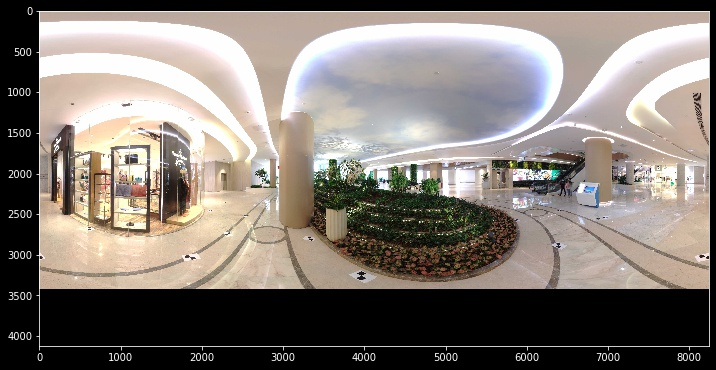

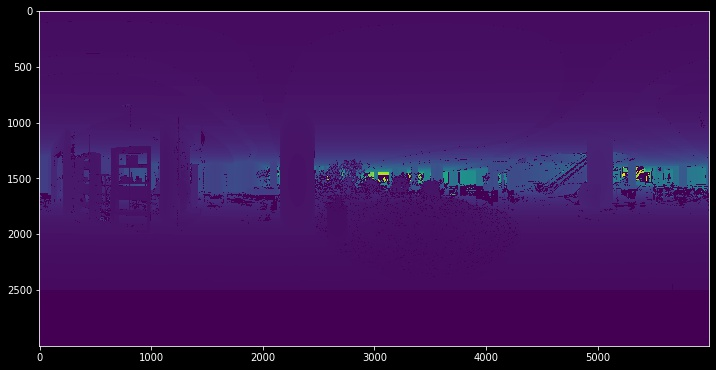

In [4]:
test_image = "pano_1.jpg" 
depth_path = "depth_1.npy"

panorama_depth = np.load(depth_path)
#test_image = "/home/viki/UTOPA/Server_Localization/match_map/winter_garden/panorama/Scan_3_031.jpg"
panorama_img = imageio.imread(test_image)[:, :, :3]
panorama_sampler = panorama_to_sampler(panorama_img)
panorama_depth_sampler = panorama_to_sampler(panorama_depth.reshape([panorama_depth.shape[0], panorama_depth.shape[1],1]))
plt.figure()
plt.imshow(panorama_img)
plt.figure()
plt.imshow(panorama_depth)

## Full pipeline function

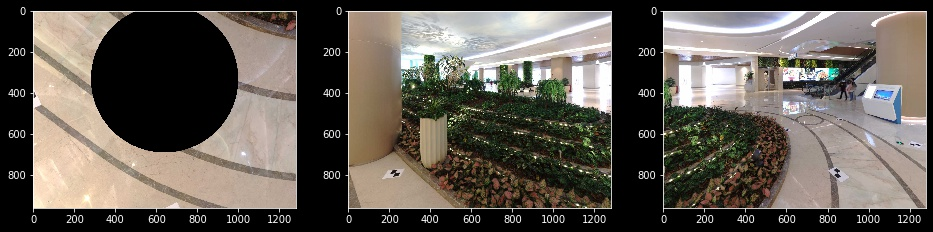

In [18]:
res = (1280, 2000)
focal = 600
width = res[0]*480/640
offset = 150

image_pinhole = panorama_to_pinhole(panorama_sampler, res, focal, [-90, 0, 0])
image_show = image_pinhole[int(res[1]/2-width/2)+offset:int(res[1]/2+width/2)+offset,:,:]

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(image_show)

image_pinhole = panorama_to_pinhole(panorama_sampler, res, focal, [0, 0, 0])
image_show = image_pinhole[int(res[1]/2-width/2)+offset:int(res[1]/2+width/2)+offset,:,:]

plt.subplot(132)
plt.imshow(image_show)

image_pinhole = panorama_to_pinhole(panorama_sampler, res, focal, [0, 80, 0])
image_show = image_pinhole[int(res[1]/2-width/2)+offset:int(res[1]/2+width/2)+offset,:,:]

plt.subplot(133)
plt.imshow(image_show)

In [19]:
res = (640, 1000)
focal = 400
width = res[0]*480/640
offset = 50

count = 30
for i in range(count):
    angle = 360/count * i
    image_pinhole = panorama_to_pinhole(panorama_sampler, res, focal, [0, angle, 0])
    image_show = image_pinhole[int(res[1]/2-width/2)+offset:int(res[1]/2+width/2)+offset,:,:]
    image_show = cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB)
    
    depth_pinhole = panorama_to_pinhole_depth(panorama_depth_sampler, res, focal, [0, angle, 0])
    depth_show = depth_pinhole[int(res[1]/2-width/2)+offset:int(res[1]/2+width/2)+offset,:,:]
    depth_show = cv2.cvtColor(depth_show, cv2.COLOR_GRAY2RGB)
    depth_show = cv2.applyColorMap(depth_show,2)
    
    cv_show = np.concatenate((image_show, depth_show), axis = 1)
    cv2.imshow('pinhole image',cv_show)
    cv2.waitKey(1)
    
cv2.destroyAllWindows()

In [8]:
cv2.destroyAllWindows()